Weight of Passengers and Crew (Wpass_crew): 6340 kgf
Total Range (R): 1740.4 km
Cd=0.0222+0.036Cl^2
L/D_Max : 17.7
L/D_Cruise : 15.33
Mach Number at Cruise Altitude of 4.5 km (M_Cruise) : 0.431
W3/W2 : 0.917
W3 Approximation : 19128.55
Clmin : 1.36
Vmin: 60.56 m/s
W4_W3 : 0.993
W5_W0 : 0.866
Wf/W0 : 0.142
W0 initial ----- We/W0 ----- W0 final
21500 ----- 0.5587 ----- 21182.76
21182.76 ----- 0.5591 ----- 21211.11
21211.11 ----- 0.5591 ----- 21211.11
Gross weight approx by iteration (W0_i) : 21211.11 kgf
Empty weight approx after iteration (We) : 11859.13 kgf
Fuel weight approx after iteration (Wf) : 3011.98 kgf

Gross weight verification (Wo): 21211.11 kgf = 208080.99 N

Wing Loading based on Landing Distance
P_land : 3399 N/m^2
The Range of P_LD : [3059,3739]

Wing Loading Based on Prescribed Velocity
Cdo=0.0222
Cfe=0.00444
wing span b= 27.15 m
root chord=3.02 m
tip chord=1.51  
c=3.02-0.1112*y
local chord=2.86
Exposed area=53.03
Wing wetted area=126.424
kT=1.41
F1=0.0129
F2=2.60504201

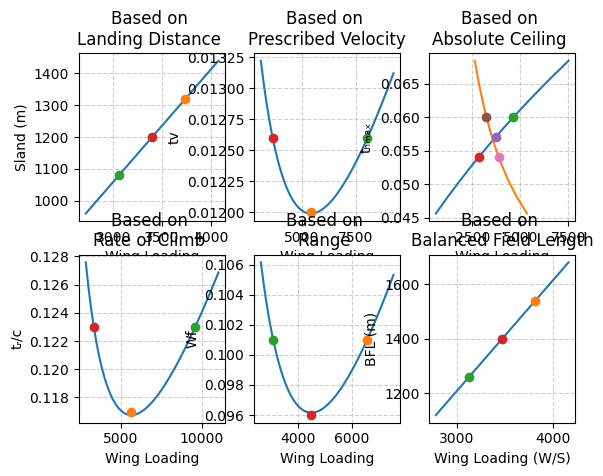

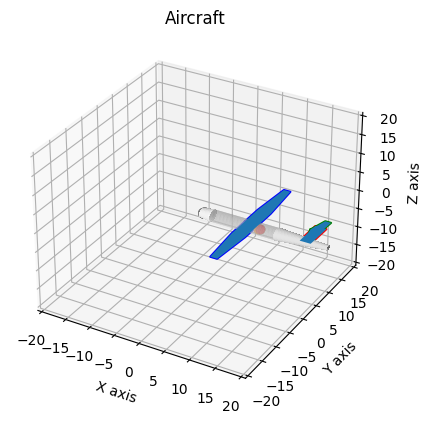

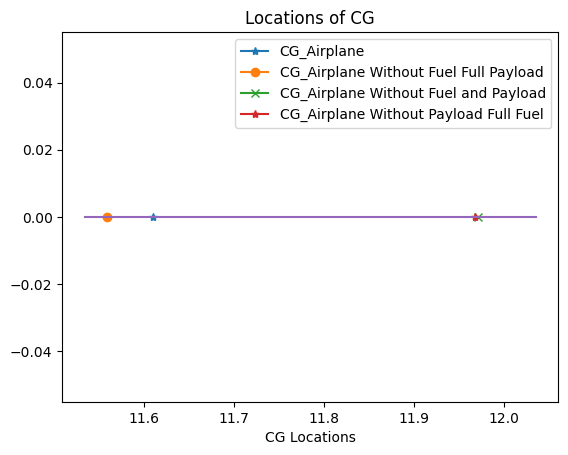

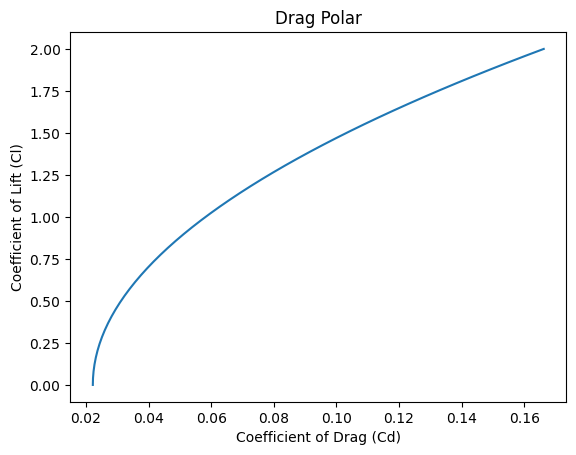

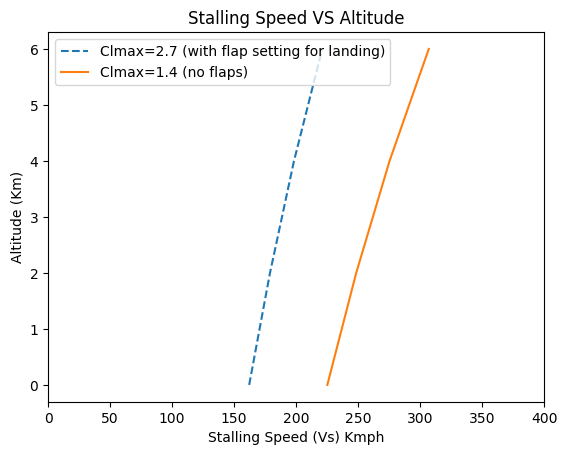

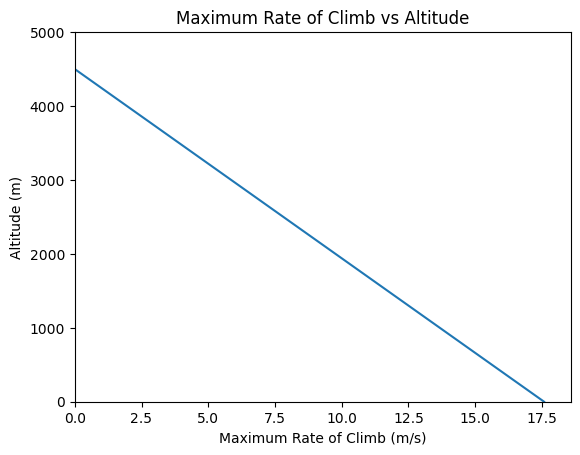

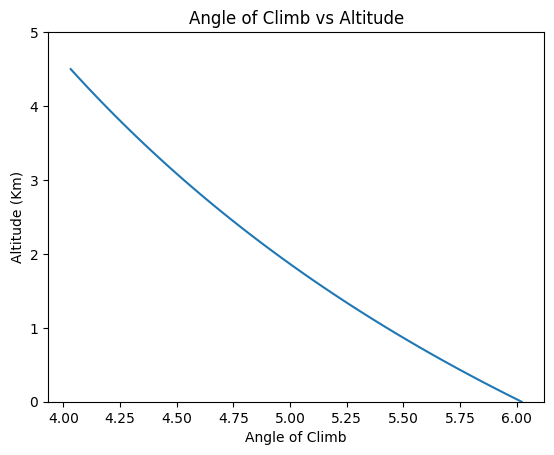

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from scipy.linalg import norm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

#Given Start
Type="Turboprop"                     #Turboprop/Turbojet
passengers=60                        #Number Of Passengers
pay_per_pass=100           #Kgf      #Payload per Passenger
Pilots=2
Crew=2                               #Number of Crew Member
pay_per_crew=85            #Kgf      #Payload per Crew Member
H_Cruise=4.5               #Km       #Cruise Altitude
V_Cruise=500               #Kmph     #Velocity at Cruise Altitude-
rho_0=1.225                #Kg/m^3   #Density at Sea Level
rho_Cruise=0.7768          #Kg/m^3   #Density at Cruise Altitude
a_cruise=1160              #Kmph     #Velocity of Sound at Cruise Altitude
S_Range=1300               #Km       #Safe Range Between Origin and Destination
D_Range=300                #km       #Range for Diversion
HW=15*3.6                  #Kmph     #Headwind
AR=12                                #Aspect Ration
S=61.43                    #m^2      #Wing Surface Area      
TR=0.5                     #radian   #Taper Ratio
sweep_c4=22                #deg
sweep_c4etw=3.9            #deg
twist=3                    #table deg wing has a twist (wash-out)
dihedral=3                 #deg choosen
sweep_LE=6.07              #deg
winginfus=0.35             #%
BR=6                                 #Bypass Ratio
W0=21500                   #kgf        #Assumed Weight
#Weight Ratios
W1_W0=0.98
W2_W1=0.99
W5_W4=0.98
#loiter
E=0.5
#Wing Loading
SLSP=3222                 #KW         #Sea Level Static Power
S_land=1200               #m         #Landing Distance        1200/1475
Cl_max=2.7                             #Cl Max                 2.7/3
BFL=1400                  #m         #Take-off Distance
T_W_TO=0.3                           #Thrust Loading 
engines=2                            #No. of Engines(2,3,4)
R_C=6.09                 #m/sec     #Rate Of Climb               7.62/11.66
W_S=3570                             #Wing Loading
t_c=0.16                             #Given
Sht_S=0.21                           #Sht/S                     0.21/0.31
Svt_S=0.20                           #Svt/S                      0.20/0.21
Swet_S=5                             #Swet/S                 5/5.5
sigma=1
N_Seats=4                    #3_4_3              #No. of Seats in a row
W_Seat=0.44                          #0.41-0.46          #Width of each seat
N_Elbow=6  
W_Elbow=0.05                         #0.037-0.05         #Width Of Elbow Rest
D_Seat_Cabinwall=0.02                                    #Distance Between Seat and Cabin Wall 
T_Cabin=0.1                                              #Thickness of Cabin Wall
                                              #No. Of Elbow Rest
W_Aisle=0.46                         #0.3-0.4            #Width of Aisle
if passengers<=60 :
    N_Aisle=1                        #_1_                #No. Of Aisle
else:
    N_Aisle=2                        #_1_1_              #No. of Aisle
fuse_fact=0.12
#Empty Weight We/W0
if (Type=='Turbojet'):
    A=1.02
    c=-0.06
elif (Type=='Turboprop'):
    A=0.92
    c=-0.05
    BSFC_cruise=2.7            #N/Kw/hr
    BSFC_loiter=2.85           #N/Kw/hr
    eff_cruise=0.85
    eff_loiter=0.75

if (Pilots==2):
    L_Cockpit=2.54
elif(Pilots==3):
    L_Cockpit=3.3
elif(Pilots==4):
    L_Cockpit=3.84

#Fuselage Length
L_Nose=0.7                      #m          #Length Of Nose
seat_rows=13                              #No. of Rows
seat_pitch=0.81                 #m          #Seat Pitch
L_galley=0.6                  #m          #Front Galley
L_door=0.7                    #m          #Front door
L_seat_galley=1.0              #m          #Gap between the screen and the back of the first row of passanger seats
L_midfus=seat_rows*seat_pitch+L_galley+L_door+L_seat_galley
L_tailcone=9                    #m          #Length Of Tail cone, includes everything behind passenger seats
            #FUSEALGE
D_end_nose=1.64                 #m
L_rearcabin=2.11                #m
We_Wo=0.559
Lac_L_fus=0.42            #Table 6.2   
Lht_Cw=5.8                #choosen
Cht=1.1
ARht=5                    #Aspect Ratio for HT
TRht=0.6                  #TaperRatio for HT
Se_Sht=0.35               #choosen
sweep_LEht=11.24          #deg
L_LEmac=0.237                   #m
Cvt=0.1                   #choosen
Lht__Lvt_b=0.05            #choosen  (lht-lvt)/b
ARvt=1.95                 #Aspect Ratio of VT
TRvt=0.7                  #TaperRatio for VT
sweep_LEvt=30             #deg  Leading edge sweep of v.tail (Λvtle)
Sr_Svt=0.3                #Rudder Area Ratio
               #ENGINES
W_Engine=450                  #kgf
L_Engine=2.13                   #m
boss_prop_LEwing=1.58      #m
base_wheel=9.78                 #m
#Table 8.1 Values
Cons_Wing=49                    #constant
cgwingpermac=40                 #%
Cons_HT=27                      #constant
cghtpermac=40                   #%
Cons_VT=27                      #constant
cgvtpermac=40                   #%
Cons_Eng=1.3                    #constant
cgenginperenglen=40             #35-45%
Cons_Fus=24                     #constant
cgfusperlen=45                  #%
Wlg_Wo=4.3                      #% Wlg/Wo

k2__k1=0.92

delCmac_airfoil=-0.6
Sf=39.65
Cf=2.691
CLmaxflap=2.7
CLmaxnoflap=1.4
deacc=-2.13                #m/s^2           #modern braking system and reverse thrust or reverse pitch propellers. 


#Payload And Crew Weight Calculations
Wpass=passengers*pay_per_pass                     #kgf    #Weight of Passengers
Wcrew=(Crew+Pilots)*pay_per_crew                           #Kgf    #Weight Of Crew Member
Wpass_crew=Wpass+Wcrew                             #Kgf    #Weight of Passengers and Crew
print(f'Weight of Passengers and Crew (Wpass_crew): {Wpass_crew} kgf')

#Total Range Calculations
F_D=S_Range/V_Cruise                               #Hr     #Flight Duration
HW_Range=F_D*HW                                    #Km     #Range due to Headwind
R=round(S_Range+D_Range+HW_Range,3)                #km     #Total Range
print(f'Total Range (R): {R} km')

#Cd = Cd0 + K*Cl^2
if(Type=='Turbojet'):
    Cd0=round(0.02686*S**(-0.1),5)                             #Coefficient Of Drag at Zero Lift
    K=round(1/(np.pi*AR)*(1.0447+0.2078/(np.cos(sweep_c4*np.pi/180)**2)),5)    #Constant
elif(Type=='Turboprop'):
    Cd0=round(0.03354*S**(-0.1),4)                             #Coefficient Of Drag at Zero Lift
    K=round((1.356)/(np.pi*AR),4)    #Constant
print(f'Cd={Cd0}+{K}Cl^2')

#L/D Calculations
L_Dmax=round(1/(2*(Cd0*K)**0.5),1)                         #Maximum Lift to Drag Ratio 
print(f'L/D_Max : {L_Dmax}')
L_Dcruise=round(0.866*L_Dmax ,2)                           #Cruise Lift to Drag Ratio 
print(f'L/D_Cruise : {L_Dcruise}')

#Cruise Level Calculations 3_4
M_Cruise=round(V_Cruise/a_cruise,3)                                                                  #Mach Number at Cruise Altitude
print(f'Mach Number at Cruise Altitude of {H_Cruise} km (M_Cruise) : {M_Cruise}')
TSFC_cruise=round((1-0.15*BR**0.65)*(1+0.28*(1+0.063*BR**2)*M_Cruise)*(rho_Cruise/rho_0)**0.08,3)
if(Type=='Turbojet'):
    #Cruise Level Calculations 3_4
    TSFC_cruise=round((1-0.15*BR**0.65)*(1+0.28*(1+0.063*BR**2)*M_Cruise)*(rho_Cruise/rho_0)**0.08,3)    #TSFC for Cruise
    print(f'TSFC for cruise (TSFC_cruise) : {TSFC_cruise}')
    W3_W2=round(np.exp(np.negative(R*TSFC_cruise/(V_Cruise*L_Dcruise))),3)                               #W3/W2
    print(f'W3/W2 : {W3_W2}')
    #Loiter Calculations
    W3_approx=round(W3_W2*W2_W1*W1_W0*W0,3)                                                              #Approximation for W3
    print(f'W3 Approximation {W3_approx}')
    Vmin=round(((K/Cd0)**0.25)*(((2*W3_approx*9.81)/(1.225*S))**0.5),3)                                 #Vmint 
    print(f"VminT: {Vmin} m/s")
    M_loiter=round(Vmin/340,3)                                                                                 #Mach Number at Loiter                                     
    print(f"Mach Number at loiter: {M_loiter}")
    TSFC_loiter=round(0.7*(1-0.15*(BR**0.65))*(1+(0.28*(1+0.063*(BR**2))*M_loiter))*((rho_0/rho_0)**0.08),3)    #TSFC at Loiter         
    print(f"TSFC in loiter: {TSFC_loiter}")                                      
    W4_W3=round(np.exp(np.negative(E)*TSFC_loiter/L_Dmax),3)                                             #W4/W3
    print(f"W4/W3: {W4_W3}")
elif(Type=='Turboprop'):
    #Cruise
    W3_W2=round(np.exp(-R*BSFC_cruise/3600/eff_cruise/L_Dmax),3)
    print(f'W3/W2 : {W3_W2}')
    #Loiter
    W3=round(W1_W0*W2_W1*W3_W2,4)
    W3_approx=W3*W0
    print(f'W3 Approximation : {W3_approx}')
    Clmin=round(np.sqrt(3*Cd0/K),2)
    print(f'Clmin : {Clmin}')
    Vmin=round(np.sqrt(2*W3_approx*9.81/(rho_0*S*Clmin)),2)
    print(f"Vmin: {Vmin} m/s")
    W4_W3=round(np.exp(-E*BSFC_loiter*Vmin/1000/eff_loiter/0.866/L_Dmax),3)
    print(f'W4_W3 : {W4_W3}')

#Fuel Weight Ratio Calculations
W5_W0=round(W1_W0*W2_W1*W3_W2*W4_W3*W5_W4,3)              #W5/W0
print(f'W5_W0 : {W5_W0}')
Wf_W0=round(1.06*(1-W5_W0),3)                             #Wf/W0
print(f'Wf/W0 : {Wf_W0}')

#Iterations
print("W0 initial ----- We/W0 ----- W0 final")
W0_i=W0
for i in range(20):
    We_W0=round((A*((W0_i)**c)),4)
    W0_f=round((Wpass_crew/(1-We_W0-Wf_W0)),2)
    print(f"{W0_i} ----- {We_W0} ----- {W0_f}")
    if W0_f==W0_i:
        break
    W0_i=W0_f
We=We_W0*W0_i
Wf=Wf_W0*W0_i
print(f"Gross weight approx by iteration (W0_i) : {W0_i} kgf")
print(f"Empty weight approx after iteration (We) : {round(We,2)} kgf")
print(f"Fuel weight approx after iteration (Wf) : {round(Wf,2)} kgf")
Wo=round(Wpass_crew+We+Wf,2)
print(f"\nGross weight verification (Wo): {Wo} kgf = {round(Wo*9.81,2)} N")

W_cabin=(N_Seats*W_Seat)+(N_Aisle*W_Aisle)+(N_Elbow*W_Elbow)+(2*D_Seat_Cabinwall)+fuse_fact
W_fus=W_cabin+2*T_Cabin


                         ###Wing Loading based on Landing Distance###
print("\nWing Loading based on Landing Distance") 
S_land_110per=S_land*1.10
S_land_90per=S_land*0.90
#P_LD=round(0.8563*rho_0*sigma*Cl_max*S_land,2)
P_land=round(0.8563*rho_0*sigma*Cl_max*S_land)
P_land_110_per=round(0.8563*rho_0*sigma*Cl_max*S_land_110per)
P_land_90_per=round(0.8563*rho_0*sigma*Cl_max*S_land_90per)
print(f'P_land : {P_land} N/m^2')
print(f'The Range of P_LD : [{round(P_land_90_per)},{round(P_land_110_per)}]')

                        ###Wing Loading Based on Prescribed Velocity###
print("\nWing Loading Based on Prescribed Velocity")
print(f"Cdo={Cd0}")
Cfe=round(Cd0/Swet_S,7)
print(f"Cfe={Cfe}")
b=round((AR*S)**0.5,2)
print(f"wing span b= {b} m")
c_root=round(2*S/(b*(1+TR)),2)
c_tip=round(TR*c_root,2)
slope=round((c_root-c_tip)/(b/2),4)
y=W_fus/2
c_local=round(c_root-slope*y,3)
print(f"root chord={c_root} m")
print(f"tip chord={c_tip}  ")
print(f"c={c_root}-{slope}*y")
print(f"local chord={c_local}")
S_exposed=round(((b-W_fus)/2)*(c_local+c_tip),3)
S_wet_w=round(2*S_exposed*(1+1.2*t_c),3)
print(f"Exposed area={S_exposed}")
print(f"Wing wetted area={S_wet_w}")
kT=1+Sht_S+Svt_S
print(f"kT={kT}")
F1=round(kT*Cfe*(S_wet_w/S),4)
F2=(Cd0-F1)/(W_S)
print(f"F1={F1}")
print(f"F2={F2}")
print(f"k={K}")
print(f"F3={K}/q^2")
print(f'Cd={F1}+{F2}p+{K}p^2/q^2')


q=round(0.5*rho_Cruise*(V_Cruise*1.1/3.6)**2,3)
F3=K/(q**2)
pv=round((F1/F3)**0.5,3)
print(f"q={q}")
print(f"F3={F3}")
print(f"pv={pv}")
cons_PV=(rho_Cruise*((V_Cruise*1.1/3.6)**3)/2000/0.85)
##range of wing loading
tv=round((rho_Cruise*((V_Cruise*1.1/3.6)**3)/2000/0.85)*(2*(F1/pv)+F2),4)
tv_5percent=round(1.05*tv,5)
print(f"tv={tv}")
print(f"add 5% tv = {tv_5percent}")
##coefficients of quadratic p equations
a_PV=cons_PV*F3
b_PV=cons_PV*F2-tv_5percent
c_PV=cons_PV*F1
P_PV_range=np.roots([a_PV,b_PV,c_PV])
print(f"Range of P_PV=[{round(P_PV_range[1])},{round(P_PV_range[0])}]")

                                  ###Wing Loading Based on Absolute Ceiling###
print("\n Wing Loading Based on Absolute Ceiling")                                  
Cl_LDmax=round((Cd0/K)**0.5,3)
print(f"Cl(L/D)max={Cl_LDmax}")
qhmax=round(W_S/Cl_LDmax,3)
print(f"qhmax={qhmax}")
thmax_1=round((4*K*(F1+F2*W_S))**0.5,3)
P_AC1=round((1/F2)*(((thmax_1**2)/(4*K))-F1),3)
print(f"thmax_AC using equation 1={thmax_1}")
thmax_1_5plus=round(1.05*thmax_1,3)
thmax_1_5minus=round(0.95*thmax_1,3)
print(f"105% tmax_1_AC={thmax_1_5plus}")
print(f"95% tmax_1_AC={thmax_1_5minus}")

##p1=(1/F2)*(((t**2)/(4*k))-F1) from equation 1
P_AC1_max=round((1/F2)*(((thmax_1_5plus**2)/(4*K))-F1),3)
P_AC1_min=round((1/F2)*(((thmax_1_5minus**2)/(4*K))-F1),3)
print(f"From eqn 1, P_ACmax={P_AC1_max}")
print(f"From eqn 1, P_ACmin={P_AC1_min}")

##p2=F1/((t/2q)-F2)from equation 2
P_AC2_max=round(F1/((thmax_1_5plus/(2*qhmax))-F2),3)
P_AC2_min=round(F1/((thmax_1_5minus/(2*qhmax))-F2),3)
print(f"From eqn 2, P_ACmax={P_AC2_max}")
print(f"From eqn 2, P_ACmin={P_AC2_min}")

max_array=np.array([P_AC1_max,P_AC2_max])
min_array=np.array([P_AC1_min,P_AC2_min])

P_AC_range=np.array([np.max(min_array),np.min(max_array)])
print(f"The range of P_AC=[{round(P_AC_range[1])},{round(P_AC_range[0])}]")

                                    ###Wing Loading Based on Rate Of Climb###
print("\n Wing Loading Based on Rate Of Climb")
Vopt=round((R_C/(rho_0*F2))**(1/3),3)
print(f"Vopt={Vopt}")
P_opt_R_C=round(0.5*rho_0*(Vopt**2)*(F1/K)**0.5,3)
print(f'P_opt : {P_opt_R_C}')
t_R_Cmin=round(R_C/Vopt+(0.5*rho_0*(Vopt**2))*(F1/P_opt_R_C+F2+K*P_opt_R_C/(0.5*rho_0*Vopt**2)**2),3)
print(f't_R/C : {t_R_Cmin}')
t_R_Cmin_5per=round(t_R_Cmin*1.05,3)
print(f'T_R/C5per : {t_R_Cmin_5per}')
a_R_C=K/(0.5*rho_0*Vopt**2)**2
b_R_C=F2-(t_R_Cmin_5per-R_C/Vopt)/(0.5*rho_0*Vopt**2)
c_R_C=F1
P_R_C_roots=np.roots([a_R_C,b_R_C,c_R_C])
print(f"The Range of P_R_C=[{round(P_R_C_roots[1])},{round(P_R_C_roots[0])}]")

                                ###Wing Loading Based on Range###
print('\n Wing Loading Based on Range')
temp_coeff=round(R*BSFC_cruise*(q/1.1**2)/3600/eff_cruise,3)
P_Range=round((F1/F3/1.1**4)**0.5,3)
print(f'Popt_range : {P_Range}')
wf_R=round(temp_coeff*(2*F1/P_Range+F2),3)
print(f"wf_R={wf_R}")
wf_R_5percent=round(1.05*wf_R,3)
print(f"105% wf_R={wf_R_5percent}")
print(f'temp_coeff = {temp_coeff}')
a_R=F3*(1.1**4)
b_R=F2-(wf_R_5percent/temp_coeff)
c_R=F1
P_Range_roots=np.roots([a_R,b_R,c_R])
print(f"The Range of P_Range=[{round(P_Range_roots[1])},{round(P_Range_roots[0])}]")

                              ###Wing Loading Based on Balanced Field Length###
print('\n Wing Loading Based on Balanced Field Length')
ClTO=0.8*Cl_max
print(f"ClTO={ClTO}")
if (engines==2):
    TOP=BFL/0.2613
    P_BFL=TOP*sigma*ClTO*T_W_TO
elif (engines==3):
    TOP=BFL/0.2387
    P_BFL=TOP*sigma*ClTO*T_W_TO
elif (engines==4):
    TOP=BFL/0.2196
    P_BFL=TOP*sigma*ClTO*T_W_TO
##p(opt)
print(f"TOP={round(TOP,3)}")
print(f"popt_BFL={round(P_BFL,3)}")
if (engines==2):
    TOP_var=0.2613
elif (engines==3):
    TOP_var=0.2387
elif (engines==4):
    TOP_var=0.2196
##p range
BFL_110percent=1.10*BFL
print(f"110% BFL={round(BFL_110percent,2)}")
BFL_90percent=0.90*BFL
print(f"90% BFL={round(BFL_90percent,2)}")

if (engines==2):
    TOP_110=BFL_110percent/0.2613
    TOP_90=BFL_90percent/0.2613
elif (engines==3):
    TOP_110=BFL_110percent/0.2387
    TOP_90=BFL_90percent/0.2387
elif (engines==4):
    TOP_110=BFL_110percent/0.2196
    TOP_90=BFL_90percent/0.2196

P_BFL_max=TOP_110*sigma*ClTO*T_W_TO
P_BFL_min=TOP_90*sigma*ClTO*T_W_TO

print(f'The Range of P_BFL : [{round(P_BFL_min)}, {round(P_BFL_max)}] ')


                                       ###Optimum Wing Loading###
P_maxofminrange=max(P_land_90_per,P_PV_range[1],P_AC_range[1],P_R_C_roots[1],P_Range_roots[1],P_BFL_min)#,P_turb)
P_minofmaxrange=min(P_land_110_per,P_PV_range[0],P_AC_range[0],P_R_C_roots[0],P_Range_roots[0],P_BFL_max)#,P_turb)                                       
print('\nWING LOADING')
print(f'The Range of Wing Loading Based on Landing Distance      : [{round(P_land_90_per)},{round(P_land_110_per)}]')
print(f"The Range of Wing Loading Based on Prescribed Velocity   : [{round(P_PV_range[1])},{round(P_PV_range[0])}]")
print(f"The Range of Wing Loading Based on Absolute Ceiling      : [{round(P_AC_range[1])},{round(P_AC_range[0])}]")
print(f'The Range of Wing Loading Based on Rate of Climb         : [{round(P_R_C_roots[1])},{round(P_R_C_roots[0])}]')
print(f"The Range of Wing Loading Based on Range                 : [{round(P_Range_roots[1])},{round(P_Range_roots[0])}]")
print(f'The Range of Wing Loading Based on Balanced Field Length : [{round(P_BFL_min)},{round(P_BFL_max)}] ')
print(f'Optimum Wing Loading : [{round(P_maxofminrange)},{round(P_minofmaxrange)}]\n')

W_S=round(SLSP*1000/Wo/0.4158,2)
print(f'Optimum Wing Loading : {W_S} Kgf')
S=round(Wo/W_S,2)
print(f'S : {S}')
                                         ###Thrust Loading###
#P_final=TOP*ClTO*T_W_TO
#print(f'P_final : {P_final}')
C_l=round(2*W_S*9.81/rho_Cruise/(V_Cruise/3.6)**2,4)
print(f'Coefficient of Lift (Cl) : {C_l}')
Cd=round(Cd0+K*C_l**2,4)
print(f'Coefficient of Drag (Cd) : {Cd}')
THP_req=round(rho_Cruise*(V_Cruise/3.6)**3*S*Cd/2000,4)
print(f'the airplane has {engines} engines, THP per engine : {THP_req/engines} KW')
print(f'BHP per Engine is : {round(THP_req/engines/0.85,2)} KW')

print('\nWING CALCULATIONS')
if(M_Cruise<=0.35):
    print(f'\nRectangular Wing')
    Cl_design=2*W_S/rho_Cruise/(V_Cruise/3.6)**2
    print(f'CL_design : {Cl_design}')
    b=np.sqrt(AR*S)
    print(f'Wing Span (b) : {b} m')
    Cr=S/(b)
    print(f'RootChord (Cr) : {Cr} m')
    Ct=Cr
    print(f'Tip Chord (Ct) : {Ct} m')
    Cw=Cr
    L_ac_LErc=Cr/4
elif(M_Cruise>=0.8):
    print(f'\nSwept Wing')
    Cl_design=2*W_S/rho_Cruise/(V_Cruise/3.6)**2
    print(f'CL_design : {Cl_design}')
    b=np.sqrt(AR*S)
    print(f'Wing Span (b) : {b} m')
    Cr=S/(b/2*(1+TR))
    print(f'RootChord (Cr) : {Cr} m')
    Ct=Cr*TR
    print(f'Tip Chord (Ct) : {Ct} m')

    def f(x):
        return 2/S*(Cr-(Cr-Ct)/(b/2)*(x))**2 
    x = sy.Symbol("x")
    Cw=sy.integrate(f(x), (x, 0, b/2))
    print(f'Mean aerodynamic chord of the wing (Cw) : {Cw} m')

    ymac=(Cr-Cw)*b/2/(Cr-Ct)
    print(f'The spanwise location (ymac) where a chord of {Cw} m is located is (ymac) : {ymac} m')

    sweep=np.tanh(np.tan(sweep_c4etw*np.pi/180)+(1/TR-1)/AR/(1/TR+1))*180/np.pi
    print(f'Sweep Angle : {sweep} deg')
    x=np.tan(sweep*np.pi/180)*y
    L_ac_LErc=x+0.25*Cw
    print(f'Distance from LE to A.C. (D_LEtoAC) : {L_ac_LErc} m')

    sweep_c2=np.tanh(np.tan(sweep_c4etw*np.pi/180)-4*0.25*(1-TR)/AR/(1+TR))
    print(f'Half-Sweep Angle (sweep_c2) : {sweep_c2} deg')
    beta=np.sqrt(1-(V_Cruise/a_cruise)**2)
    Cl_alpha=(2*np.pi*AR)/(2+(4+(AR**2)*(beta**2)*(1+np.tan(sweep_c2)**2/beta**2))**0.5)*np.pi/180
    print(f'Cl_alpha : {Cl_alpha}')

    Alpha_0l=-0.6*twist
    iw=Cl_design/Cl_alpha+Alpha_0l
    print(f'Wing incidence (iw) : {iw} deg')
else:
    print('\nRectangular Swept Wing')
    Cl_design=round(2*W_S*9.81/(rho_Cruise*(V_Cruise/3.6)**2),3)
    print(f'Cl_design : {Cl_design}')
    b=round(np.sqrt(S*AR),3)
    print(f'Wing Length (b) : {b} m')
    Cr=round(S/(winginfus*b+2*((1+TR)/2)*(1-winginfus)/2*b),3)
    print(f'RootChord (Cr) : {Cr} m')
    Ct=round(TR*Cr,3)
    print(f'TipChord (Ct) : {Ct} m')

    def f(x):
        return 2*(Cr**2)/S
    x = sy.Symbol("x")
    a=sy.integrate(f(x), (x, 0, b*0.35/2))
    def f(z):
        return 2/S*(Cr-(Cr-Ct)/(0.65*b/2)*(z-b*0.35/2))**2 
    z = sy.Symbol("z")
    c=sy.integrate(f(z), (z, b*0.35/2, b/2))

    Cw=round(a+c,3)
    print(f'Mean aerodynamic chord of the wing (Cw) : {Cw} m')
    ymac=round((Cr-Cw)*b/2*0.65/(Cr-Ct)+0.35*b/2,3)
    print(f'The spanwise location (ymac) where a chord of {Cw} m is located is (ymac) : {ymac} m')
    L_ac_LErc=round((ymac-b*0.35/2)*np.tan(sweep_LE*np.pi/180)+Cw/4,3)
    print(f'The location of a.c. from the leading edge of the root chord is (L_ac_LErc) : {L_ac_LErc} m')
#Equivalent Trapezoidal Wing
    print('\nEquivalent Trapezoidal Wing')
    Cre=round(S*2/b-Ct,2)
    print(f'The root chord (Cre) of ETW : {Cre} m')
    TRe=round(Ct/Cre,3)
    print(f'Taper ratio of (λe) of ETW (TRe) : {TRe}')
    sweep_c2=round((np.tanh(np.tan(sweep_c4etw*np.pi/180)-4*0.25*(1-TRe)/AR/(1+TRe)))*180/np.pi,3)
    print(f'the value of tan Λ_2 is (sweep_c2) : {sweep_c2} deg')
    beta=round(np.sqrt(1-(M_Cruise)**2),3)
    Cl_alpha=round((2*np.pi*AR)/(2+(4+(AR**2)*(beta**2)*(1+np.tan(sweep_c2*np.pi/180)**2/beta**2))**0.5)*np.pi/180,3)
    print(f'Cl_alpha : {Cl_alpha} deg')
    print(f'Twist (ε) : {twist} deg')
    Alpha_0l=-0.6*twist                          #Angle of Zero Lift
    iw=round(Cl_design/Cl_alpha+Alpha_0l,3)
    print(f'Wing incidence (iw) : {iw} deg')
    print(f'Dihedral angle (Γ) : {dihedral} deg')

print('\nFUSELAGE SIZING')
W_cabin=(N_Seats*W_Seat)+(N_Aisle*W_Aisle)+(N_Elbow*W_Elbow)+(2*D_Seat_Cabinwall)+fuse_fact
print(f'Cabin Width (W_Cabin) : {round(W_cabin,2)}m')
W_fus=W_cabin+2*T_Cabin
print(f'Fuselage Width (W_fus) : {round(W_fus,2)}m')
L_fus=L_Nose+L_Cockpit+L_midfus+L_tailcone
print(f'Fuselage Length (L_fus) : {round(L_fus,2)} m')

#HORIZONTAL TAIL NPTEL Pg379-381
print('\nHORIZOTAL TAIL SIZING')
Lac=round(L_fus*Lac_L_fus,2)
print(f'Lac : {Lac} m')
Lht=round(Lht_Cw*Cw,2)
print(f'Lht : {Lht} m')
Lac_Htail=round(Lht+Lac,2)
print(f'Distance of A.C. of H.Tail from nose of the fuselage (Lac_Htail) : {Lac_Htail} m')
Sht_S=round(Cht/Lht_Cw,2)
print(f"Sht_S: {Sht_S}")
Sht=round(Sht_S*S,2)
print(f'Area of H.Tail (Sht) : {Sht} m^2')
Se=round(Se_Sht*Sht,2)
print(f'Area of Elevator of H.Tail (Se) : {Se} m^2')
bht=round((ARht*Sht)**0.5,2)
print(f'Span of H.Tail (bht) : {bht} m')
Crht=round(Sht*2/bht/(1+TRht),2)
print(f'Rootchord of H.Tail (Crht) : {Crht} m')
Ctht=Crht*TRht
print(f'Tipchord of H.Tail (Ctht) : {Ctht} m')
C_ht=2/3*Crht*(1+TRht+TRht**2)/(1+TRht)
print(f'Mean aerodynamic chord for H.Tail (C_ht) : {C_ht} m')
ymac_ht=round((Crht-C_ht)*bht/2/(Crht-Ctht),2)
print(f'The location of the m.a.c. of the H.Tail (ymac_ht) is : {ymac_ht} m')
L_acht_LErc=round(ymac_ht*np.tan(sweep_LEht*np.pi/180)+C_ht/4,2)
print(f'The location of the a.c. of H.Tail from the leading edge of its root chord : {L_acht_LErc} m')

#VERTICAL TAIL NPTEL Pg382-384
print('\nVERTICAL TAIL SIZING')
Lht_Lvt=round(Lht__Lvt_b*b,2)            #Lht-Lvt
print(f'Lht-Lvt : {Lht_Lvt} m')
Lvt=round(Lht-Lht_Lvt,2)
print(f'Lvt : {Lvt} m')
Lvt_b=round(Lvt/b,3)
print(f'Lvt/b : {Lvt_b}')
Lac_Vtail=round(Lvt+Lac,2)
print(f'Location of a.c. of V.Tail from nose of fuselage (Lac_Vtail) : {Lac_Vtail} m')
Svt_S=round(Cvt/Lvt_b,4)
Svt=round(Svt_S*S,2)
print(f'The area of V.Tail is (Svt) : {Svt} m^2')
Sr=round(Sr_Svt*Svt,2)
print(f'Rudder Area V.Tail (Sr) : {Sr} m^2')
Hvt=round((ARvt*Svt)**0.5,2)
print(f'Height of V.Tail (Hvt) : {Hvt} m')
Crvt=round(Svt*2/Hvt/(1+TRvt),2)
print(f'Rootchord V.Tail (Crvt) : {Crvt} m')
Ctvt=round(Crvt*TRvt,2)
print(f'Tipchord V.Tail (Ctvt) : {Ctvt} m')
C_vt=round(2/3*Crvt*(1+TRvt+TRvt**2)/(1+TRvt),2)
print(f'Mean aerodynamic chord for V.tail (C_vt) : {C_vt} m')
ymac_vt=round((Crvt-C_vt)*Hvt/(Crvt-Ctvt),3)
print(f'The location of the m.a.c. of the V.Tail (ymac_vt) is : {ymac_vt} m')
L_acvt_LErc=round(ymac_vt*np.tan(sweep_LEvt*np.pi/180)+C_vt/4,3)
print(f'The location of the a.c. from leading edge of the root chord of V.Tail : {L_acvt_LErc} m')

#WING
print('\nCENTRE OF GRAVITY')
print('\nWING')
S_exposed=round(S-2.88*Cr,2)
print(f'Area of Wing Exposed (S_exposed) : {S_exposed} m^2')
Wwing=round(S_exposed*Cons_Wing*9.81,2)
print(f'The estimated weight of the wing (Wwing) : {Wwing} N')
Wwing_Wo=round(Wwing/Wo/9.81*100,2)
print(f'Wwing/Wo : {Wwing_Wo} %')
CG_wing_LErc=round(L_LEmac+cgwingpermac*Cw/100,3)
print(f'The location of the c.g. of wing from the leading edge of the root chord of the wing (CG_wing_LErc) : {CG_wing_LErc} m')

#HORIZONTAL TAIL
print('\nHORIZONTAL TAIL')
Wht=round(Sht*Cons_HT*9.81)
print(f'The weight of H.Tail (Wht) : {Wht} N')
Wht_Wo=round(Wht/Wo/9.81*100,2)
print(f'Wht/Wo : {Wht_Wo} %')
Lht_LEr_LEmac=ymac_ht*np.tan(sweep_LEht*np.pi/180)
CG_ht_LErc=round(Lht_LEr_LEmac+cghtpermac*C_ht/100,2)
print(f'The distance between the leading edge of the root chord of h.tail and the c.g. of H.Tail (CG_ht_LErc) : {CG_ht_LErc} m')

#VERTICAL TAIL
print('\nVERTICAL TAIL')
Wvt=round(Svt*Cons_VT*9.81)
print(f'The weight of V.Tail (Wvt) : {Wvt} N')
Wvt_Wo=round(Wvt/Wo/9.81*100,2)
print(f'Wht/Wo : {Wvt_Wo} %')
Lvt_LEr_LEmac=ymac_vt*np.tan(sweep_LEvt*np.pi/180)
CG_vt_LErc=round(Lvt_LEr_LEmac+cgvtpermac*C_vt/100,2)
print(f'The distance between the leading edge of the root chord of h.tail and the c.g. of H.Tail (CG_vt_LErc) : {CG_vt_LErc} m')

#ENGINE
print('\nENGINE')
Wengine=round(2*Cons_Eng*W_Engine*9.81)
print(f'The weight of Engine (Wengine) : {Wengine} N')
Wengine_Wo=round(Wengine/Wo/9.81*100,1)
print(f'Wht/Wo : {Wengine_Wo} %')
CG_eng_LE=round(-boss_prop_LEwing+cgenginperenglen*L_Engine/100,3)
print(f'The location of engine c.g. from the leading edge of the wing (CG_eng_LE) : {CG_eng_LE} m')

#LANDING GEAR
print(f'\nLANDING GEAR')
Wlg=round(Wlg_Wo*Wo*9.81/100)
print(f'The weight of the nose wheel plus the main landing gear (Wlg) : {Wlg} N')
Wnwlg=round(0.15*Wlg)
Wmwlg=round(0.85*Wlg)
print(f'The weight of the nose wheel landing gear (Wnwlg) : {Wnwlg} N')
print(f'The weight of the main landing gear (Wlg) : {Wmwlg} N')
CG_nwLG=round(-0.9*base_wheel,3)
CG_mwLG=round(0.1*base_wheel,3)
print(f'The c.g. of the nose wheel (CG_nwLG) : {CG_nwLG} m')
print(f'The c.g. of the main wheels (CG_mwLG) : {CG_mwLG} m')

#FUSELAGE
print('\nFUSELAGE')
S_wet_nose=round(np.pi*L_Nose*D_end_nose/2,2)
print(f'The wetted area or surface area of nose (S_wet_nose) : {S_wet_nose} m^2')
S_wet_cockpit=round(np.pi*np.average(W_fus+D_end_nose)*L_Cockpit/2,2)
print(f'The wetted area of cockpit portion (S_wet_cockpit) : {S_wet_cockpit} m^2')
S_wet_midfus=round(np.pi*L_midfus*W_fus,2)
print(f'The wetted area or surface area of nose (S_wet_midfus) : {S_wet_midfus} m^2')
S_wet_tailcone=round(np.pi*L_tailcone*W_fus/2,2)
print(f'The wetted area of tail cone (S_wet_tailcone) : {S_wet_tailcone} m^2')
S_wet_fus=round(S_wet_nose+S_wet_cockpit+S_wet_midfus+S_wet_tailcone,2)
print(f'The wetted area of fuselage (S_wet_fus) : {S_wet_fus}')
Wfus=round(S_wet_fus*Cons_Fus*9.81,2)
print(f'The weight of fuselage (Wfus) : {Wfus} N')
Wfus_Wo=round(Wfus/Wo/9.81*100,2)
print(f'Wfus/Wo : {Wfus_Wo} %')
CG_fus=round(cgfusperlen*L_fus/100,2)
print(f'The c.g. of the fuselage and systems (CG_fus) : {CG_fus} m')
Wfus_sys=round((We_Wo-(Wwing_Wo+Wht_Wo+Wvt_Wo+Wengine_Wo+Wlg_Wo)/100)*Wo*9.81,2)
print(f'The weight of fuselage+systems (Wfus_sys) : {Wfus_sys} N')

#FUEL
print('\nFUEL')
Wfuel=round(Wf_W0*Wo*9.81,2)
print(f'The weight of fuel (Wfuel) : {Wfuel} N')
Wfuel_Wo=round(Wfuel/Wo/9.81*100,2)
print(f"Wfuel_Wo : {Wfuel_Wo}")
CG_fuel_LErc=CG_wing_LErc
print(f'The location of the c.g. of fuel from the leading edge of the root chord of the wing (CG_fuel_LErc) : {CG_fuel_LErc} m')

#PAYLOAD AND CREW
print('\nPAYLOAD AND CREW')
Wpay=Wpass_crew*9.81
print(f'The weight of the crew and passangers plus the baggage (Wpay) : {Wpay} N')
CG_pay=L_Nose+L_Cockpit+np.average(L_midfus+L_rearcabin)/2
print(f'The location of c.g. of payload and crew (CG_pay) : {CG_pay}  m')

#Xlew
xlew_wing=CG_wing_LErc
xlew_engine=CG_eng_LE
xlew_fuel=CG_fuel_LErc
xlew_ht=L_ac_LErc+Lht+(0.4-0.25)*C_ht
xlew_vt=L_ac_LErc+Lvt+(0.4-0.25)*C_vt
xlew_nwlg=L_ac_LErc+CG_nwLG
xlew_mwlg=L_ac_LErc+CG_mwLG
xlew_fus=CG_fus
xlew_pay=CG_pay


print('\nItem----------W(N)-------------x(m)----------------W.x(Nm)')
print(f'Wing---------{round(Wwing,2)}--------xlew+{round(xlew_wing,2)}---------{round(Wwing,2)}xlew+{round(Wwing*xlew_wing,2)}')
print(f'Engines------{round(Wengine,2)}---------xlew{round(xlew_engine,2)}---------{round(Wengine,2)}xlew-{round(Wengine*xlew_engine,2)}')
print(f'Fuel---------{round(Wfuel,2)}--------xlew+{round(xlew_fuel,2)}---------{round(Wfuel,2)}xlew+{round(Wfuel*xlew_fuel,2)}')
print(f'H.Tail-------{round(Wht,2)}---------xlew+{round(xlew_ht,2)}--------{round(Wht,2)}xlew+{round(Wht*xlew_ht,2)}')
print(f'V.Tail-------{round(Wvt,2)}---------xlew+{round(xlew_vt,2)}--------{round(Wvt,2)}xlew+{round(Wvt*xlew_vt,2)}')
print(f'Nose Wheel---{round(Wnwlg,2)}---------xlew{round(xlew_nwlg,2)}---------{round(Wnwlg,2)}xlew-{round(Wnwlg*xlew_nwlg,2)}')
print(f'Main Wheel---{round(Wmwlg,2)}---------xlew+{round(xlew_mwlg,2)}---------{round(Wmwlg,2)}xlew+{round(Wmwlg*xlew_mwlg,2)}')
print(f'Fus+Sys------{round(Wfus_sys,2)}--------xlew+{round(xlew_fus,2)}--------{round(Wfus_sys*xlew_fus,2)}')
print(f'Pay+Crew-----{round(Wpay,2)}---------xlew+{round(xlew_pay,2)}--------{round(Wpay*xlew_pay,2)}')
print(f'-----------------------------------------------{round(Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg,2)}xlew + {round(Wwing*xlew_wing+Wengine*xlew_engine+Wfuel*xlew_fuel+Wht*xlew_ht+Wvt*xlew_vt+Wnwlg*xlew_nwlg+Wmwlg*xlew_mwlg+Wfus_sys*xlew_fus+Wpay*xlew_pay,2)}')
print(f'Airplane with c.g. at 0.25Cw-----{round(Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg+Wfus_sys+Wpay,2)}----xlew+{round(L_ac_LErc,2)}')

xlew=((Wwing*xlew_wing+Wengine*xlew_engine+Wfuel*xlew_fuel+Wht*xlew_ht+Wvt*xlew_vt+Wnwlg*xlew_nwlg+Wmwlg*xlew_mwlg+Wfus_sys*xlew_fus+Wpay*xlew_pay)-(Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg+Wfus_sys+Wpay)*L_ac_LErc)/((Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg+Wfus_sys+Wpay)-(Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg))
CG_Airplane=round(xlew+L_ac_LErc,2)
print(f'\nThe c.g. of the airplane is (CG_Airplane) : {CG_Airplane} m')
print("\nCG Shift with Variations")
xlew_wofuel=round(((Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg)*xlew+(Wwing*xlew_wing+Wengine*xlew_engine+Wfuel*xlew_fuel+Wht*xlew_ht+Wvt*xlew_vt+Wnwlg*xlew_nwlg+Wmwlg*xlew_mwlg+Wfus_sys*xlew_fus+Wpay*xlew_pay)-(Wfuel*xlew+Wfuel*xlew_fuel))/((Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg+Wfus_sys+Wpay-Wfuel)),2)
CG_Airplane_wofuel=xlew_wofuel
print(f'The c.g. of the airplane Full payload, but no fuel is (CG_Airplane_wofuel) : {CG_Airplane_wofuel} m')
print(f"Full payload, but no fuel c.g. shift as fraction of cw is {round((CG_Airplane_wofuel-CG_Airplane)/Cw*100,1)}%")
xlew_wofuelpayload=round(((Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg)*xlew+(Wwing*xlew_wing+Wengine*xlew_engine+Wfuel*xlew_fuel+Wht*xlew_ht+Wvt*xlew_vt+Wnwlg*xlew_nwlg+Wmwlg*xlew_mwlg+Wfus_sys*xlew_fus+Wpay*xlew_pay)-(Wfuel*xlew+Wfuel*xlew_fuel+Wpass*9.81*xlew_pay))/((Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg+Wfus_sys+Wpay-Wfuel-Wpass*9.81)),3)
CG_Airplane_wofuelpayload=xlew_wofuelpayload
print(f'The c.g. of the airplane No payload and no fuel is (CG_Airplane_wofuelpayload) : {CG_Airplane_wofuelpayload} m')
print(f"No payload and no fuel c.g. shift as fraction of cw is {round((CG_Airplane_wofuelpayload-CG_Airplane)/Cw*100,1)}%")
xlew_wopayload=round(((Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg)*xlew+(Wwing*xlew_wing+Wengine*xlew_engine+Wfuel*xlew_fuel+Wht*xlew_ht+Wvt*xlew_vt+Wnwlg*xlew_nwlg+Wmwlg*xlew_mwlg+Wfus_sys*xlew_fus+Wpay*xlew_pay)-(Wpass*9.81*xlew_pay))/((Wwing+Wengine+Wfuel+Wht+Wvt+Wnwlg+Wmwlg+Wfus_sys+Wpay-Wpass*9.81)),3)
CG_Airplane_wopayload=xlew_wopayload
print(f'The c.g. of the airplane No payload but full fuel is (CG_Airplane_wopayload) : {CG_Airplane_wopayload} m')
print(f"No payload but full fuel c.g. shift as fraction of cw is {round((CG_Airplane_wopayload-CG_Airplane)/Cw*100,1)}%")

print('\nFlight Mechanics')
#Drag Polar
print(f"Drag Polar")
print(f"Cd={Cd0}+{K}Cl^2")
print(f"L/Dmax : {L_Dmax}")
Vs=round(np.sqrt(2*W_S*9.81/rho_0/CLmaxflap)*3.6,2)
print(f"Stalling Speed (Vs) : {Vs} kmph")

print(f'Coefficient of Lift (Cl) : {C_l}')
print(f'Coefficient of Drag (Cd) : {Cd}')
L_D=round(C_l/Cd,2)
print(f'L/D : {L_D}')
L=round(C_l*(0.5*rho_0*(V_Cruise/3.6)**2*S),2)
D=round(Cd*(0.5*rho_0*(V_Cruise/3.6)**2*S),2)
print(f'Lift : {L} N')
print(f'Drag : {D} N')


#Takeoff Parameter
print(f"\nTakeoff Parameter")
print(f"Clto : {ClTO}")
print(f"W/S : {W_S*9.81}")
V1=round(1.16*Vs,2)
print(f"V1 : {V1} kmph")
V2=round(1.086*V1,2)
print(f"V2 : {V2} kmph")

Sto=round(1.21*Wo*9.81/(9.81*1.225*S*CLmaxnoflap*T_W_TO),2)
print(f"Takeoff Distance (Sto) : {Sto} m")

##Rate of Climb
print("\nRate of Climb")
T=0.2*Wo*9.81
RClimb=round((2*T-D)*V2/3.6/Wo/9.81,2)
print(f"Rate of Climb (R/C) : {RClimb}m/s")
Aclimb=round(np.arcsin(RClimb/Vs)*180/np.pi,2)
print(f"Angle of Climb : {Aclimb} degree")

##Level Turn
print("\nLevel Turn")
n=round(L/Wo/9.81/np.cos(np.pi/180*30),2)
print(f"Loading Factor (n) : {n}")
Rt=round((V_Cruise/3.6)**2/(9.81*(np.sqrt(n**2-1))),2)
print(f"Turn Radius (Rt) : {Rt} m")
omega=round(V_Cruise/3.6/Rt,2)
print(f"omega : {omega} rad/s")


##Gliding
print("\nGliding")
phi=round(np.tanh(1/L_Dcruise)*180/np.pi,3)
print(f"phi : {phi} deg")


##Landing Distance
print(f"\nLanding Distance")
Va=1.3*Vs/3.6
S_landdist=round(-(Va**2)/2/deacc,2)                 
print(f"Landing Distance : {S_landdist} m")


                                                        ####Figures###
y1 = np.linspace(S_land*0.80,S_land*1.20,100)
x1 = (0.8563*rho_0*sigma*Cl_max*y1)
x2 = np.linspace(P_PV_range[1]*0.85,P_PV_range[0]*1.15)
y2 = (cons_PV)*(F1/x2+F2+F3*x2)
y3= np.linspace(thmax_1*0.80, thmax_1*1.20,10)
x3_1 = (1/F2)*(((y3**2)/(4*K))-F1)
x3_2 = F1/((y3/(2*qhmax))-F2)
x4 = np.linspace(P_R_C_roots[1]*0.85,P_R_C_roots[0]*1.15)
y4 = R_C/Vopt+(0.5*rho_0*(Vopt**2))*(F1/x4+F2+K*x4/(0.5*rho_0*Vopt**2)**2)
x5 = np.linspace(P_Range_roots[1]*0.85,P_Range_roots[0]*1.15)
y5 = temp_coeff*(F1/x5+F2+F3*x5*(1.1**4))
y6 = np.linspace(BFL*0.80, BFL*1.20)
x6 = y6*sigma*ClTO*T_W_TO/TOP_var
plt.subplot(2, 3, 1)
plt.plot(x1, y1, '-')
plt.plot(P_land_110_per,S_land_110per,"o-")
plt.plot(P_land_90_per, S_land_90per,'o-')
plt.plot(P_land,S_land,'o-')
plt.grid(alpha =.6, linestyle ='--')
plt.title('Based on \nLanding Distance ')
plt.xlabel('Wing Loading')
plt.ylabel('Sland (m)')

plt.subplot(2, 3, 2)
plt.plot(x2, y2, '-')
plt.plot(pv,tv,'o-')
plt.plot(P_PV_range[0],tv_5percent,'o-')
plt.plot(P_PV_range[1],tv_5percent,'o-')
plt.grid(alpha =.6, linestyle ='--')
plt.title('Based on \nPrescribed Velocity')
plt.xlabel('Wing Loading')
plt.ylabel('tv')

plt.subplot(2, 3, 3)
plt.plot(x3_1, y3, '-')
plt.plot(x3_2,y3,'-')
plt.plot(P_AC1_max,thmax_1_5plus,'o-')
plt.plot(P_AC1_min,thmax_1_5minus,'o-')
plt.plot(P_AC1,thmax_1,'o-')
plt.plot(P_AC2_max,thmax_1_5plus,'o-')
plt.plot(P_AC2_min,thmax_1_5minus,'o-')
plt.grid(alpha =.6, linestyle ='--')
plt.title('Based on \nAbsolute Ceiling ')
plt.xlabel('Wing Loading')
plt.ylabel(u't\u2095\u2098\u2090\u2093')

plt.subplot(2, 3, 4)
plt.plot(x4, y4, '-')
plt.title('Based on \nRate of Climb ')
plt.plot(P_opt_R_C,t_R_Cmin,'o-')
plt.plot(P_R_C_roots[0],t_R_Cmin_5per,'o-')
plt.plot(P_R_C_roots[1],t_R_Cmin_5per,'o-')
plt.grid(alpha =.6, linestyle ='--')
plt.xlabel('Wing Loading')
plt.ylabel('t\u1D63\u002F\u0063')

plt.subplot(2,3 , 5)
plt.plot(x5, y5, '-')
plt.plot(P_Range_roots[0],wf_R_5percent,'o-')
plt.plot(P_Range_roots[1],wf_R_5percent,'o-')
plt.plot(P_Range,wf_R,'o-')
plt.grid(alpha =.6, linestyle ='--')
plt.title('Based on \nRange ')
plt.xlabel('Wing Loading')
plt.ylabel('Wf')

plt.subplot(2, 3, 6)
plt.plot(x6, y6, '-')
plt.plot(P_BFL_max,TOP_110*TOP_var,'o-')
plt.plot(P_BFL_min,TOP_90*TOP_var,'o-')
plt.plot(P_BFL,TOP*TOP_var,'o-')
plt.grid(alpha =.6, linestyle ='--')
plt.title('Based on \nBalanced Field Length')
plt.ylabel('BFL (m)')
plt.xlabel('Wing Loading (W/S)')
plt.show()

if (Type=='Turboprop'):
    Hwing=W_cabin*2/6
    Hht=Hvt*0.75
    xvvt=xlew_vt/2
    xhht=xlew_ht/2+L_acht_LErc
elif( Type=='Turbojet'):
    Hwing=-W_cabin/3
    xvvt=xlew_vt
    Hht=Hvt*0.1
    xhht=xlew_ht+L_acht_LErc
x_wing=xlew-2*xlew_wing

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Vertical Tail
xvt = np.array([0+xlew_vt+xvvt,xvvt+xlew_vt+Hvt*np.tan(sweep_LEvt*np.pi/180),xvvt+xlew_vt+Hvt*np.tan(sweep_LEvt*np.pi/180)+Ctvt,xvvt+xlew_vt+Ctvt,xvvt+xlew_vt+0])
yvt = np.array([0,0,0,0,0])
zvt = np.array([0,Hvt,Hvt,0,0])
ax.plot(xvt, yvt, zvt, color='red')
vertsvt = [list(zip(xvt,yvt,zvt))]
ax.add_collection3d(Poly3DCollection(vertsvt))
#Horizontal Tail
yht = np.array([0, bht/2, bht/2, 0,-bht/2,-bht/2,0])
xht = np.array([-Crht/4+xlew_ht+xhht,xhht+ xlew_ht+bht/2*np.tan(sweep_LEht*np.pi/180)-Ctht/4,xhht+xlew_ht +bht/2*np.tan(sweep_LEht*np.pi/180)+3*Ctht/4,xhht+ xlew_ht+3*Crht/4,xhht+xlew_ht +bht/2*np.tan(sweep_LEht*np.pi/180)+3*Ctht/4 ,xhht+xlew_ht +bht/2*np.tan(sweep_LEht*np.pi/180)-Ctht/4,xhht+xlew_ht-Crht/4])
zht=np.array([Hht,Hht,Hht,Hht,Hht,Hht,Hht])
ax.plot(xht, yht, zht, color='green')
vertsht = [list(zip(xht,yht,zht))]
ax.add_collection3d(Poly3DCollection(vertsht))
#Wing

if(M_Cruise<=0.35):
    ywing = np.array([0, b/2, b/2, 0,-b/2,-b/2,0])
    xwing = np.array([-Cr/4+xlew_wing+x_wing,xlew_wing-Ct/4+x_wing,xlew_wing+3*Ct/4+x_wing, xlew_wing+3*Cr/4+x_wing, xlew_wing+3*Ct/4+x_wing ,xlew_wing -Ct/4+x_wing,xlew_wing-Cr/4+x_wing])
    zwing= np.array([Hwing,Hwing,Hwing,Hwing,Hwing,Hwing,Hwing])
elif(M_Cruise>=0.8):
    ywing = np.array([0, b/2, b/2, 0,-b/2,-b/2,0])
    xwing = np.array([-Cr/4+xlew_wing+x_wing,xlew_wing +b/2*np.tan(sweep_c4*np.pi/180)-Ct/4+x_wing,xlew_wing +b/2*np.tan(sweep_c4*np.pi/180)+3*Ct/4+x_wing, xlew_wing+3*Cr/4+x_wing, xlew_wing+b/2*np.tan(sweep_c4*np.pi/180)+3*Ct/4 +x_wing,xlew_wing +b/2*np.tan(sweep_c4*np.pi/180)-Ct/4+x_wing,xlew_wing-Cr/4+x_wing])
    zwing= np.array([Hwing,Hwing,Hwing,Hwing,Hwing,Hwing,Hwing])
else:
    ywing = np.array([0, b/2*0.35, b/2, b/2,b/2*0.35,0,-b/2*0.35,-b/2,-b/2,-b/2*0.35,0])
    xwing = np.array([-Cr/4+xlew_wing+x_wing,xlew_wing-Cr/4+x_wing,xlew_wing +Cr/4-Ct/2+x_wing, xlew_wing+Cr/4+Ct/2+x_wing, xlew_wing+3*Cr/4 +x_wing,xlew_wing +3*Cr/4+x_wing,xlew_wing+3*Cr/4+x_wing, xlew_wing+Cr/4+Ct/2+x_wing, xlew_wing+Cr/4-Ct/2+x_wing, xlew_wing-Cr/4+x_wing,xlew_wing-Cr/4+x_wing])
    zwing= np.array([Hwing,Hwing,Hwing,Hwing,Hwing,Hwing,Hwing,Hwing,Hwing,Hwing,Hwing])
ax.plot(xwing, ywing, zwing, color='blue')
vertswing = [list(zip(xwing,ywing,zwing))]
ax.add_collection3d(Poly3DCollection(vertswing))
#MidFuselage
theta = np.linspace(0, 2 * np.pi, 201)
radius = W_cabin/2
x = np.linspace(L_Cockpit, L_Cockpit +L_midfus, 20)
thetas, xs = np.meshgrid(theta, x)
y = radius * np.cos(thetas)
z = radius * np.sin(thetas)
ax.plot_surface(xs, y, z, color='white', alpha=0.5)

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x+1, y, z, color="grey")
ax.set_title("Sphere")

def truncated_cone(p0, p1, R0, R1, color):
    v = p1 - p0
    mag = norm(v)
    v = v / mag
    not_v = np.array([1, 1, 1])
    if (v == not_v).all():
        not_v = np.array([1, 1, 1])
    n1 = np.cross(v, not_v)
    n1 /= norm(n1)
    n2 = np.cross(v, n1)
    n = 80
    t = np.linspace(0, mag, n)
    theta = np.linspace(0, 2 * np.pi, n)
    t, theta = np.meshgrid(t, theta)
    R = np.linspace(R0, R1, n)
    X, Y, Z = [p0[i] + v[i] * t + R *
               np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    ax.plot_surface(X, Y, Z, color=color, linewidth=0, antialiased=False)

A0 = np.array([L_midfus+L_Cockpit, 0,0 ])
A1 = np.array([L_fus, 0, 0.25])
truncated_cone(A1, A0, 0.5,W_cabin/2, 'white')

A2 = np.array([L_Cockpit, 0,0 ])
A3 = np.array([0.5, 0, 0])
truncated_cone(A3, A2, W_cabin*0.35,W_cabin/2, 'white')

xcg=CG_Airplane
ycg=0
zcg=0
ax.plot(xcg, ycg, zcg, 'o-')

xcg=CG_Airplane_wofuel
ycg=0
zcg=0
ax.plot(xcg, ycg, zcg, 'o-')

xcg=CG_Airplane_wopayload
ycg=0
zcg=0
ax.plot(xcg, ycg, zcg, 'o-')

xcg=CG_Airplane_wofuelpayload
ycg=0
zcg=0
ax.plot(xcg, ycg, zcg, 'o-')
# Set the labels for the axes
ax.set_title('Aircraft')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.set_xlim(-20,20,1)
ax.set_ylim(-20,20,1)
ax.set_zlim(-20,20,1)
#ax.legend(["Vertical Tail","Horizontal Tail", "Wing","MidFuselage", "Nose", "TTailcone", "Cockpit", "CG"])
plt.show()

# CG Locations Plot
x1 = [L_fus/2-1,L_fus/2-0.5]
y1 = [0,0]
plt.plot(CG_Airplane, 0, '*-')
plt.plot(CG_Airplane_wofuel, 0, 'o-')
plt.plot(CG_Airplane_wofuelpayload, 0, 'x-')
plt.plot(CG_Airplane_wopayload, 0, '*-')
plt.plot(x1, y1, '-')
plt.legend(["CG_Airplane","CG_Airplane Without Fuel Full Payload", "CG_Airplane Without Fuel and Payload","CG_Airplane Without Payload Full Fuel"])  
plt.xlabel("CG Locations")
plt.title('Locations of CG')
plt.show()

##DRAG POLAR
y  = np.linspace(0,2)
x =Cd0+ K*y**2
plt.plot(x,y)
plt.title('Drag Polar')
plt.xlabel("Coefficient of Drag (Cd)")
plt.ylabel("Coefficient of Lift (Cl)")
plt.show()

y=[0,2,4,6]
rhovar=[1.225,1.006,0.819,0.659]
plt.plot(np.sqrt(2*W_S*9.18/rhovar/CLmaxflap)*3.6,y,"--")
plt.plot(np.sqrt(2*W_S*9.18/rhovar/CLmaxnoflap)*3.6,y)
plt.title('Stalling Speed VS Altitude')
plt.xlabel("Stalling Speed (Vs) Kmph")
plt.ylabel("Altitude (Km)")
plt.legend(["Clmax=2.7 (with flap setting for landing)","Clmax=1.4 (no flaps)","Maximum Speed"])
plt.xlim([0,400])
plt.show()

x=np.linspace(0,RClimb)
y=-H_Cruise*1000/RClimb*x+H_Cruise*1000
plt.plot(x,y,"-")
plt.ylim([0,5000])
plt.xlim([0,RClimb+1])
plt.title("Maximum Rate of Climb vs Altitude")
plt.xlabel("Maximum Rate of Climb (m/s)")
plt.ylabel("Altitude (m)")
plt.show()

y=np.linspace(0,H_Cruise)
x=np.linspace(Vs,250)
plt.plot(np.arcsin(RClimb/x)*180/np.pi,y)
plt.ylim([0,5])
plt.title("Angle of Climb vs Altitude")
plt.xlabel("Angle of Climb")
plt.ylabel("Altitude (Km)")
plt.show()

